In [2]:
import pandas as pd
import random
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")
from tensorflow.keras import layers, models





In [3]:
path_labels_data = ".\labels_data"
path_arguments_data = ".\\arguments_data"

# 1. Corpus

In [4]:
def load_file():
    '''Load the file and return the data and labels for training, testing and validation'''
    
    train_data = pd.read_csv(os.path.join(path_arguments_data, 'arguments-training.tsv'), sep='\t')
    test_data = pd.read_csv(os.path.join(path_arguments_data, 'arguments-test.tsv'), sep='\t')
    valid_data = pd.read_csv(os.path.join(path_arguments_data, 'arguments-validation.tsv'), sep='\t')
    train_labels = pd.read_csv(os.path.join(path_labels_data, 'labels-training.tsv'),sep='\t')
    test_labels = pd.read_csv(os.path.join(path_labels_data, 'labels-test.tsv'),sep='\t')
    valid_labels = pd.read_csv(os.path.join(path_labels_data, 'labels-validation.tsv'),sep='\t')

    return (train_data,train_labels), (test_data,test_labels), (valid_data,valid_labels)
    



(train_data,train_labels), (test_data,test_labels), (valid_data,valid_labels) = load_file()

print("Trainig data shape: ", train_data.shape)
print("Validation data shape: ", valid_data.shape)
print("Test data shape: ", test_data.shape)

print("Level 2 Classes: ", len(train_labels.columns[1:]))

Trainig data shape:  (5393, 4)
Validation data shape:  (1896, 4)
Test data shape:  (1576, 4)
Level 2 Classes:  20


In [5]:
train_data.head()

,Argument ID,Conclusion,Stance,Premise
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...


In [6]:
train_labels.head()

,Argument ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A01005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,A01006,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A01007,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,A01008,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [7]:
train_labels.columns


Index(['Argument ID', 'Self-direction: thought', 'Self-direction: action',
       'Stimulation', 'Hedonism', 'Achievement', 'Power: dominance',
       'Power: resources', 'Face', 'Security: personal', 'Security: societal',
       'Tradition', 'Conformity: rules', 'Conformity: interpersonal',
       'Humility', 'Benevolence: caring', 'Benevolence: dependability',
       'Universalism: concern', 'Universalism: nature',
       'Universalism: tolerance', 'Universalism: objectivity'],
      dtype='object')

In [8]:
def merge_df(data, labels):
    return pd.merge(data, labels, on='Argument ID')

In [9]:
l2_train_df = merge_df(train_data, train_labels)
l2_test_df = merge_df(test_data, test_labels)
l2_valid_df = merge_df(valid_data, valid_labels)


In [10]:
l2_train_df.shape

(5393, 24)

In [11]:
for column in l2_train_df.iloc[:,4:].columns:
    print(f"Unique values taken by \"{column}\" label: {np.unique(l2_train_df[column].values)}, number = {l2_train_df[column].nunique()}")
    


Unique values taken by "Self-direction: thought" label: [0 1], number = 2
Unique values taken by "Self-direction: action" label: [0 1], number = 2
Unique values taken by "Stimulation" label: [0 1], number = 2
Unique values taken by "Hedonism" label: [0 1], number = 2
Unique values taken by "Achievement" label: [0 1], number = 2
Unique values taken by "Power: dominance" label: [0 1], number = 2
Unique values taken by "Power: resources" label: [0 1], number = 2
Unique values taken by "Face" label: [0 1], number = 2
Unique values taken by "Security: personal" label: [0 1], number = 2
Unique values taken by "Security: societal" label: [0 1], number = 2
Unique values taken by "Tradition" label: [0 1], number = 2
Unique values taken by "Conformity: rules" label: [0 1], number = 2
Unique values taken by "Conformity: interpersonal" label: [0 1], number = 2
Unique values taken by "Humility" label: [0 1], number = 2
Unique values taken by "Benevolence: caring" label: [0 1], number = 2
Unique val

In [12]:
l2_train_df.head()

,Argument ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [13]:
level2_to_level3 = {
    'Openness to change':["Self-direction: thought", "Self-direction: action","Stimulation", "Hedonism"],
    "Self-enhancement":['Hedonism','Achievement', 'Power: dominance', 'Power: resources','Face'],
    "Conservation": ['Face', 'Security: personal', 'Security: societal', 'Tradition', 'Conformity: rules', 'Conformity: interpersonal','Humility'],
    "Self-transcendence":['Humility', 'Benevolence: caring', 'Benevolence: dependability','Universalism: concern', 'Universalism: nature','Universalism: tolerance', 'Universalism: objectivity']
}

    

In [14]:
counts_train = l2_train_df.iloc[:,4:].eq(1).sum()
total_counts_train = counts_train.sum()
print("Count of Level 2 category in Training Dataset: \n\n{}".format(counts_train))
print("\nTotal count of Level 2 categories in Training Dataset: {}".format(total_counts_train))

Count of Level 2 category in Training Dataset: 

Self-direction: thought        988
Self-direction: action        1395
Stimulation                    247
Hedonism                       172
Achievement                   1512
Power: dominance               610
Power: resources               625
Face                           382
Security: personal            2000
Security: societal            1728
Tradition                      568
Conformity: rules             1177
Conformity: interpersonal      207
Humility                       395
Benevolence: caring           1332
Benevolence: dependability     806
Universalism: concern         2081
Universalism: nature           427
Universalism: tolerance        664
Universalism: objectivity     1054
dtype: int64

Total count of Level 2 categories in Training Dataset: 18370


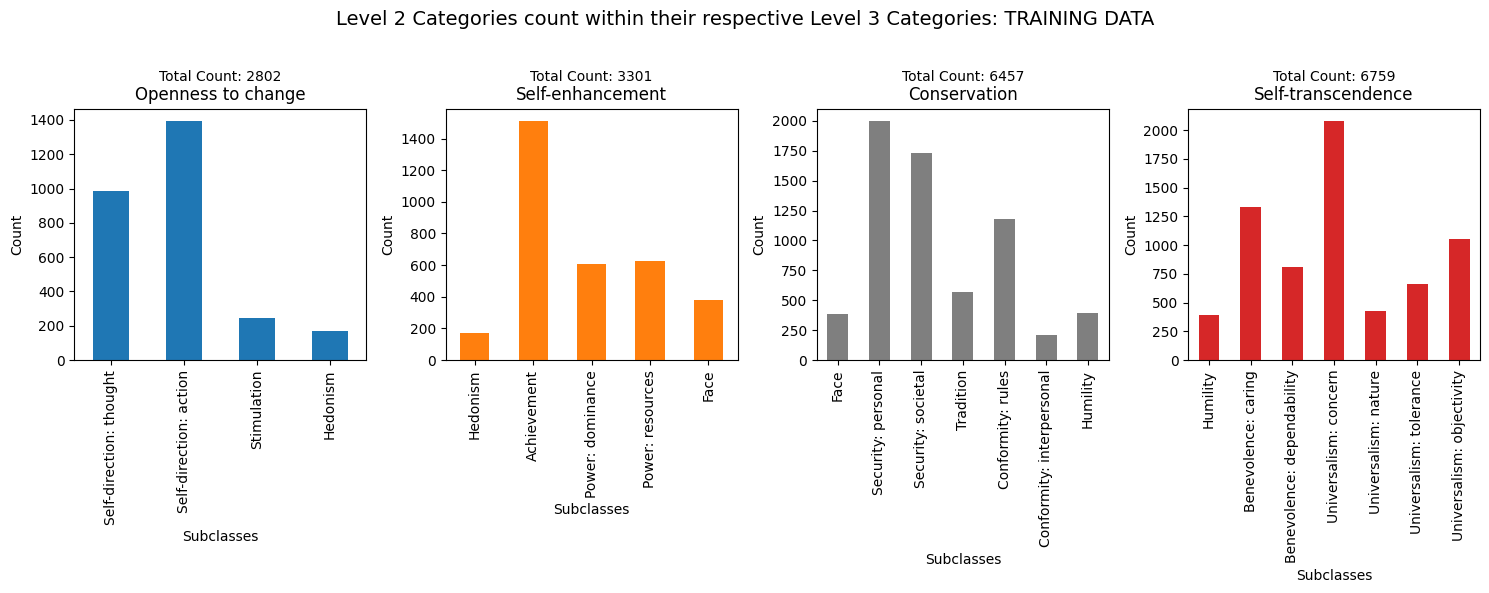

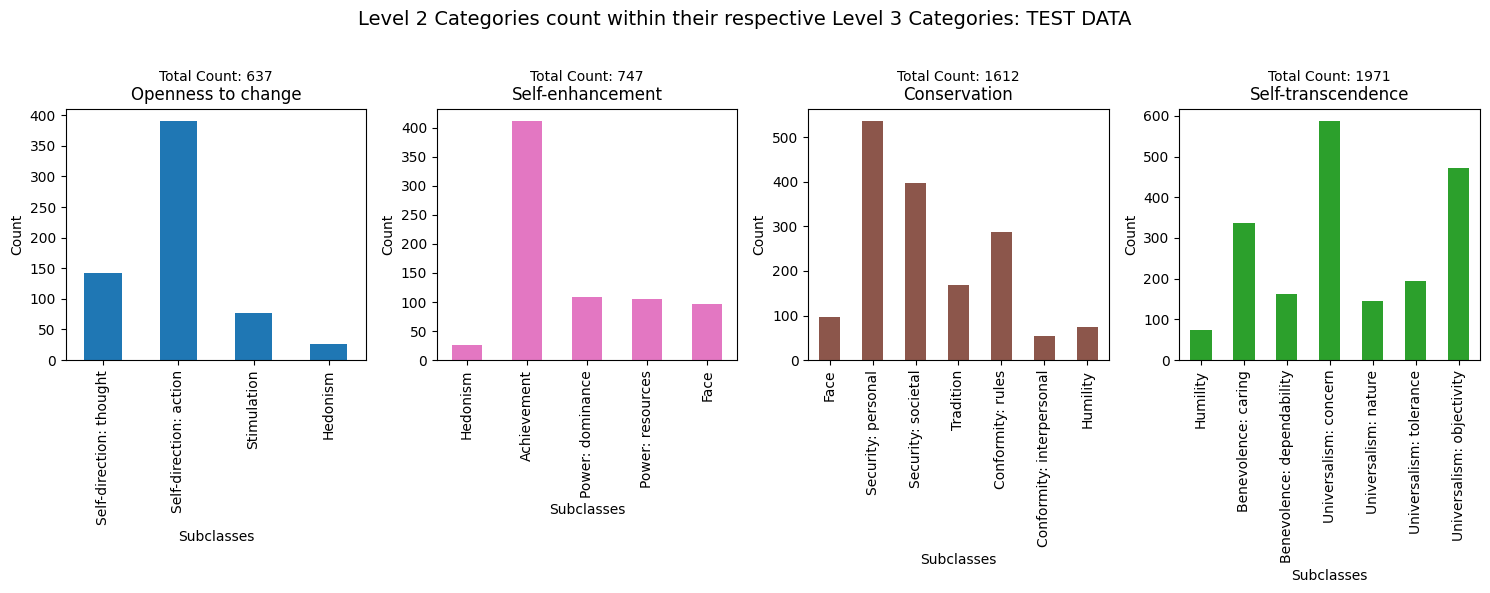

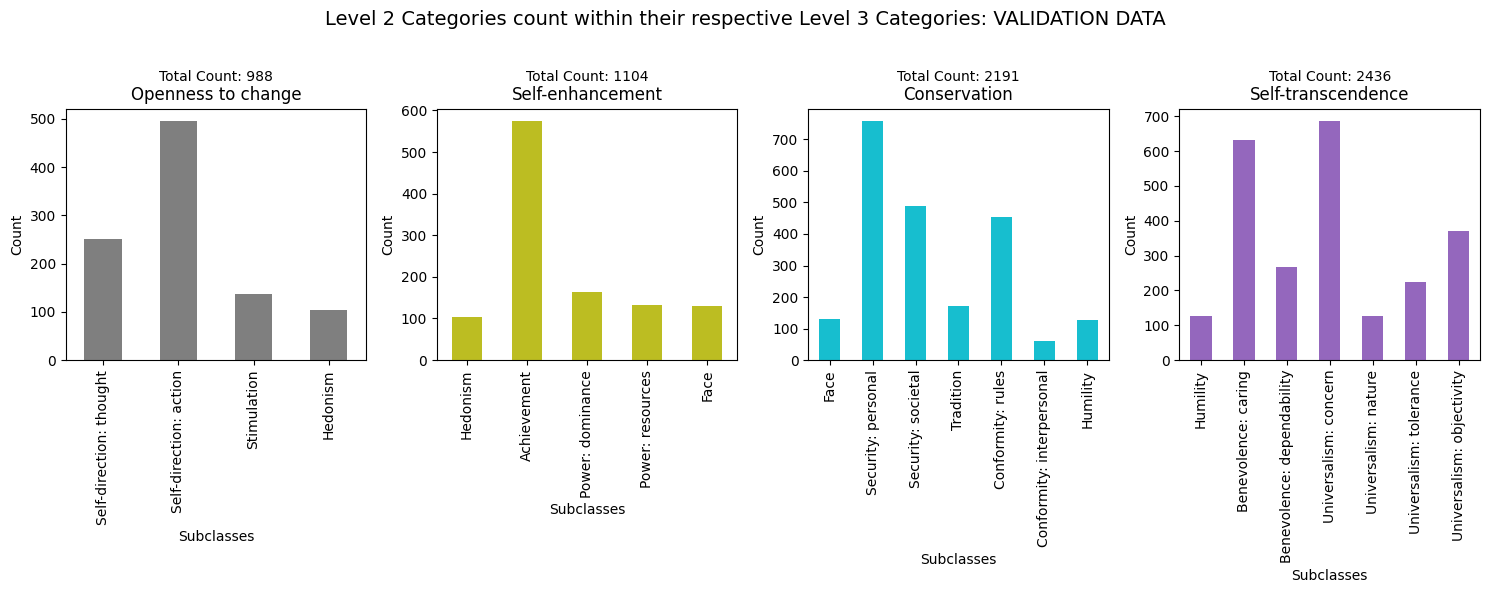

In [15]:
def plot_l2_to_l3_count(df:pd.DataFrame, title):
    '''Plot the histogram of the labels'''
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,6 ))
    colors = random.sample(list(mcolors.TABLEAU_COLORS.keys()), 4)
    
    for i, (label, subclasses) in enumerate(level2_to_level3.items()):
        ax = axes[i]
        df[subclasses].eq(1).sum().plot(kind='bar', ax=ax, color=colors[i])
        ax.set_title(f'{label}')
        ax.set_xlabel('Subclasses')
        ax.set_ylabel('Count')
        total_count = df[subclasses].eq(1).sum().sum() 
        ax.text(0.5, 1.11, f'Total Count: {total_count}', transform=ax.transAxes, ha='center')  
        
    plt.suptitle(f"Level 2 Categories count within their respective Level 3 Categories: {str.upper(title)} DATA",fontsize=14)
    plt.tight_layout()
    plt.show()

plot_l2_to_l3_count(l2_train_df, "Training")
plot_l2_to_l3_count(l2_test_df, "Test")
plot_l2_to_l3_count(l2_valid_df, "Validation")

    

In [39]:
l2_train_df.describe()


,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
count,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000
mean,0.183200,0.258669,0.045800,0.031893,0.280363,0.113110,0.115891,0.070833,0.370851,0.320415,0.105322,0.218246,0.038383,0.073243,0.246987,0.149453,0.385871,0.079177,0.123123,0.195439
std,0.386867,0.437944,0.209071,0.175732,0.449218,0.316756,0.320124,0.256569,0.483077,0.466679,0.306996,0.413094,0.192137,0.260559,0.431299,0.356567,0.486845,0.270039,0.328608,0.396575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
def get_level3_labels_df(df,labels_df):
    label3_df = labels_df[['Argument ID']].copy()
    
    for label3, labels2 in level2_to_level3.items():
        start_label = labels2[0]
        end_label = labels2[-1] 
        label3_df[label3] = (labels_df.loc[:,start_label:end_label].sum(axis=1) > 0).astype("float32")
        
    l3_df = pd.merge(df, label3_df, on='Argument ID')

    return l3_df

train_df = get_level3_labels_df(train_data,train_labels)
test_df = get_level3_labels_df(test_data,test_labels)
valid_df = get_level3_labels_df(valid_data,valid_labels)
train_df.head()


,Argument ID,Conclusion,Stance,Premise,Openness to change,Self-enhancement,Conservation,Self-transcendence
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0.0,0.0,1.0,0.0
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0.0,0.0,1.0,0.0
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,0.0,1.0,1.0,0.0
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,0.0,0.0,1.0,1.0
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,0.0,0.0,1.0,1.0


In [17]:
train_df.shape

(5393, 8)

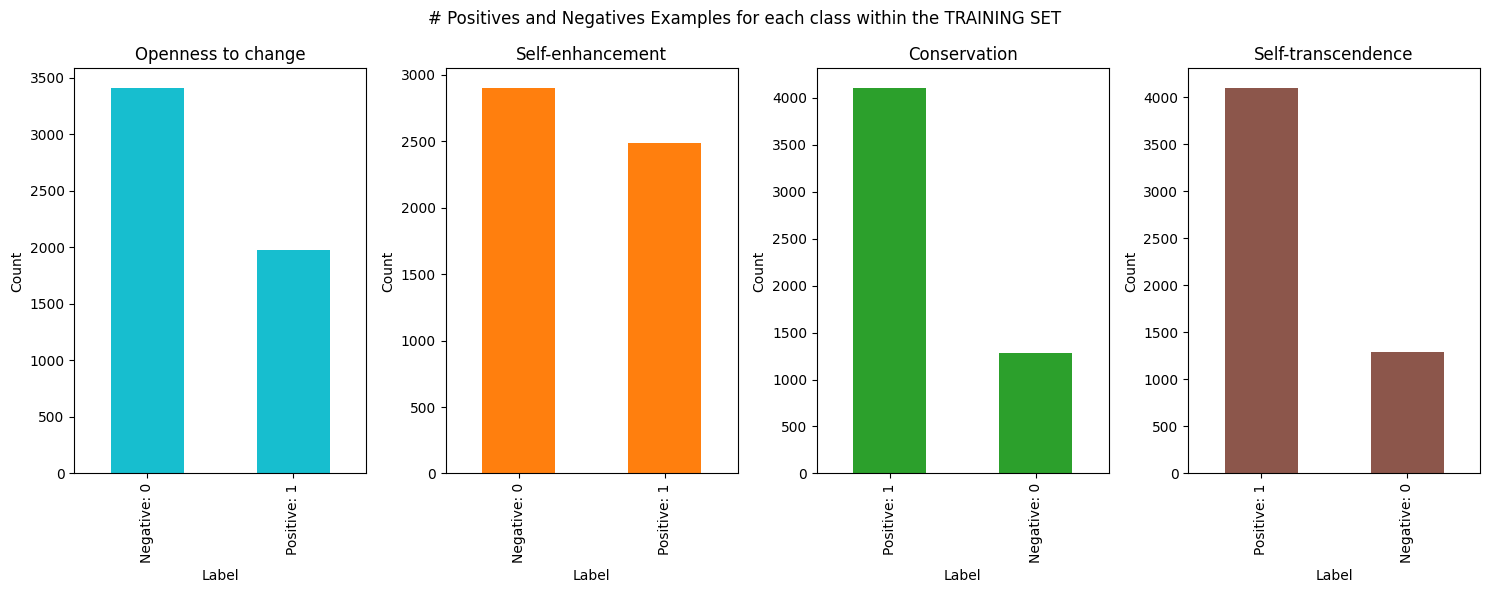

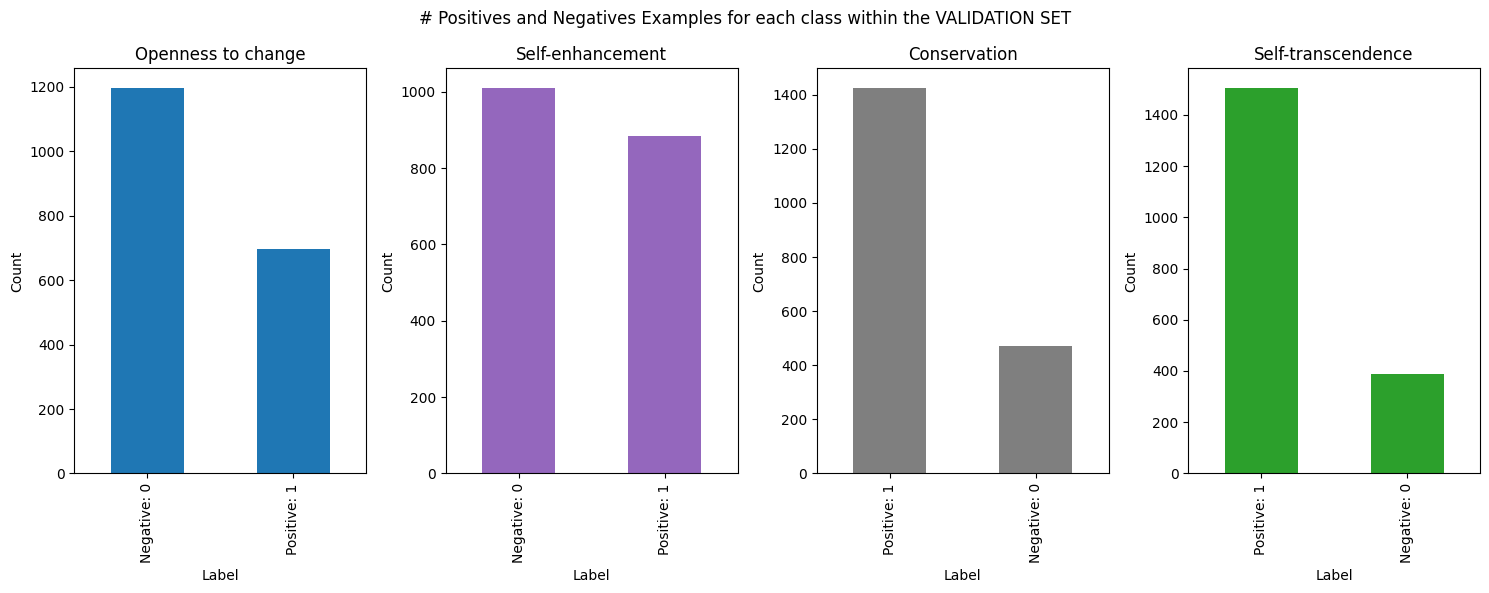

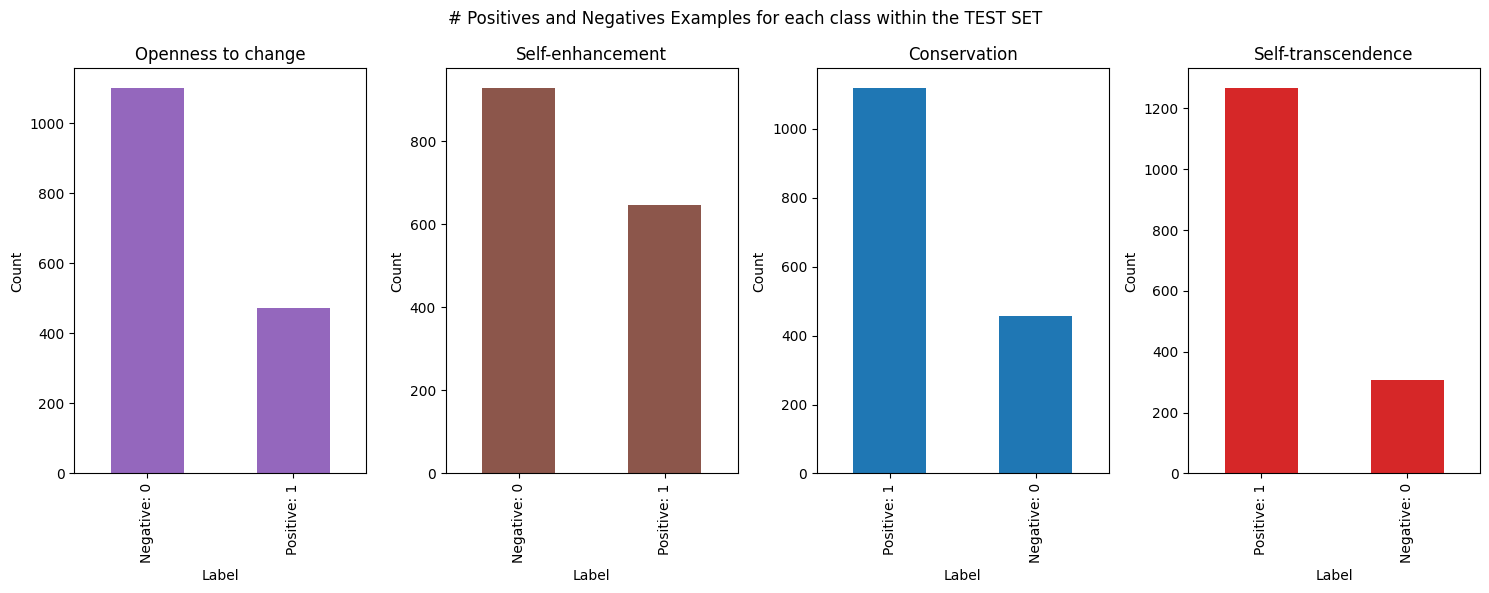

In [18]:
def plot_label_count(df: pd.DataFrame, title:str):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
    colors = random.sample(list(mcolors.TABLEAU_COLORS.keys()), 4)
    labels = list(level2_to_level3.keys())


    for i,label in enumerate(labels):
        ax = axes[i]
        count_labels = df[label].replace({0: 'Negative: 0', 1: 'Positive: 1'}).value_counts()
        count_labels.plot(kind='bar', ax=ax, color=colors[i], label=label)
        ax.set_title(f'{label}')
        ax.set_xlabel('Label')
        ax.set_ylabel('Count')
        
    plt.suptitle(f'# Positives and Negatives Examples for each class within the {str.upper(title)} SET', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_label_count(train_df,"training")
plot_label_count(valid_df,"Validation")
plot_label_count(test_df,"Test")

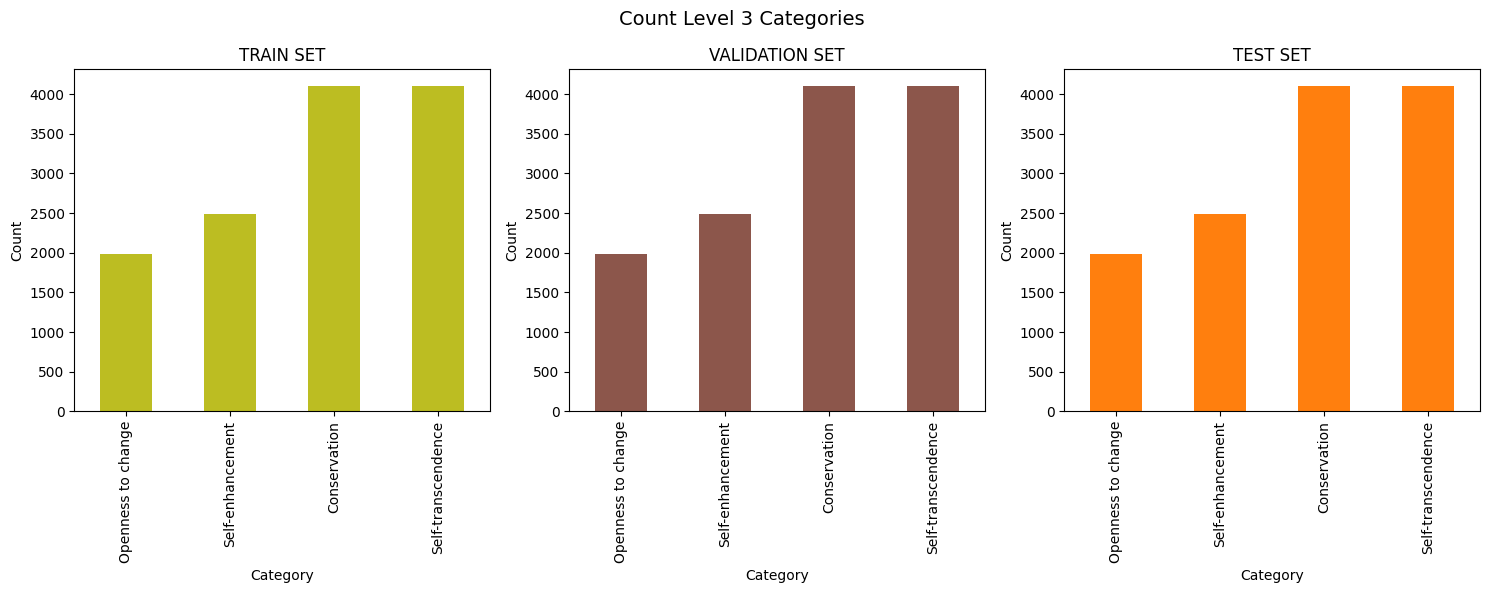

In [19]:

def plot_samples_per_class(df_train, df_valid, df_test):

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
    axes = axes.flatten()
    colors = random.sample(list(mcolors.TABLEAU_COLORS.keys()), 4)
    labels = list(level2_to_level3.keys())

    for i in range(3):
        ax = axes[i]
        train_counts = df_train[labels].eq(1).sum()
        valid_counts = df_valid[labels].eq(1).sum()
        test_counts = df_test[labels].eq(1).sum()
        
        train_counts.plot(kind='bar', ax=ax, color=colors[i])
        valid_counts.plot(kind='bar', ax=ax, color=colors[i])
        test_counts.plot(kind='bar', ax=ax, color=colors[i])
        ax.set_title(f'{["TRAIN SET", "VALIDATION SET", "TEST SET"][i]}')
        ax.set_xlabel('Category')
        ax.set_ylabel('Count')
        ax.set_xticklabels(labels)

        
    plt.suptitle('Count Level 3 Categories ', fontsize=14)
    plt.tight_layout()
    plt.show()


plot_samples_per_class(train_df,valid_df,test_df)

In [20]:
train_df.describe()

,Openness to change,Self-enhancement,Conservation,Self-transcendence
count,5393.000000,5393.000000,5393.000000,5393.000000
mean,0.366957,0.461524,0.761543,0.761172
std,0.482019,0.498564,0.426180,0.426407
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


### Maybe these analyses don't make much sense.

In [21]:
correlation_matrix = train_df[['Openness to change', 'Self-enhancement', 'Conservation', 'Self-transcendence']].corr()
print(correlation_matrix)


                    Openness to change  Self-enhancement  Conservation  \
Openness to change            1.000000          0.115484     -0.189673   
Self-enhancement              0.115484          1.000000     -0.043188   
Conservation                 -0.189673         -0.043188      1.000000   
Self-transcendence           -0.134770         -0.064169      0.018234   

                    Self-transcendence  
Openness to change           -0.134770  
Self-enhancement             -0.064169  
Conservation                  0.018234  
Self-transcendence            1.000000  


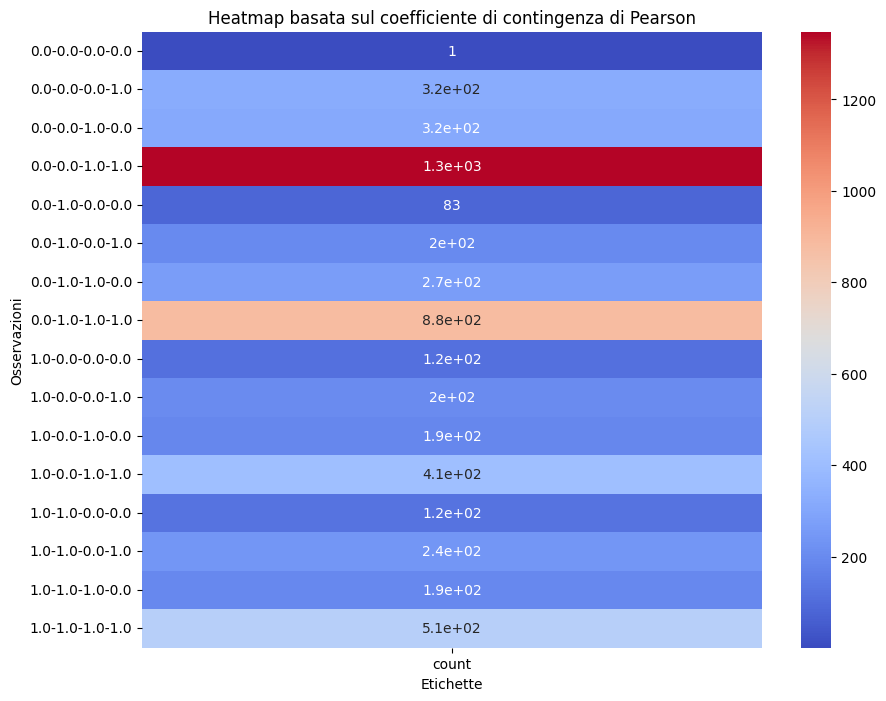

In [22]:

contingency_table = pd.crosstab(index=[train_df['Openness to change'],train_df['Self-enhancement'],train_df['Conservation'], train_df['Self-transcendence']], columns='count')

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap="coolwarm")
plt.title('Heatmap basata sul coefficiente di contingenza di Pearson')
plt.xlabel('Etichette')
plt.ylabel('Osservazioni')
plt.show()

# 2 Models Definition

### BASELINE MODELS

In [81]:
def compute_labels_prob_distribution(df,title):
    print(f"{str.upper(title)} SET:\n")
    for i in df.columns[4:]:
        print(f"Probability distribution of {i} \n{df[i].value_counts(normalize=True).round(2)}")
        print("\n")
        
        
    

compute_labels_prob_distribution(train_df,"train")

TRAIN SET:

Probability distribution of Openness to change 
Openness to change
0.0    0.63
1.0    0.37
Name: proportion, dtype: float64


Probability distribution of Self-enhancement 
Self-enhancement
0.0    0.54
1.0    0.46
Name: proportion, dtype: float64


Probability distribution of Conservation 
Conservation
1.0    0.76
0.0    0.24
Name: proportion, dtype: float64


Probability distribution of Self-transcendence 
Self-transcendence
1.0    0.76
0.0    0.24
Name: proportion, dtype: float64




TRAIN SET:



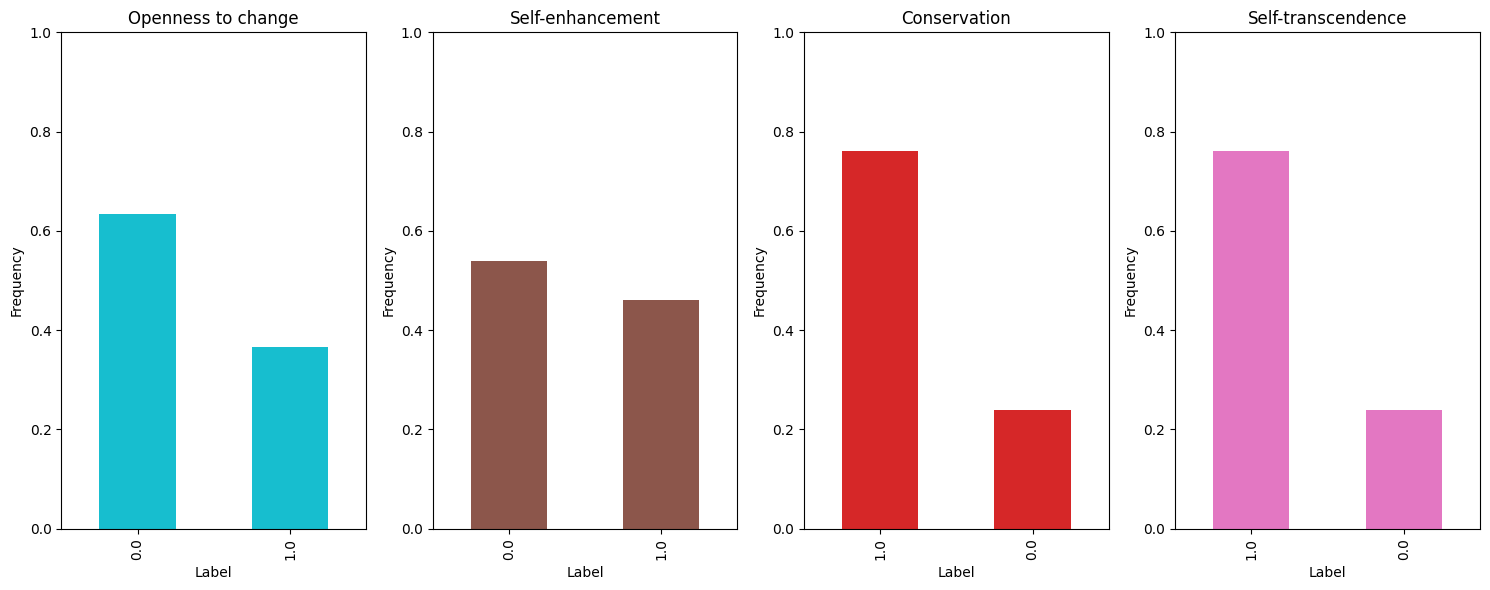

VALIDATION SET:



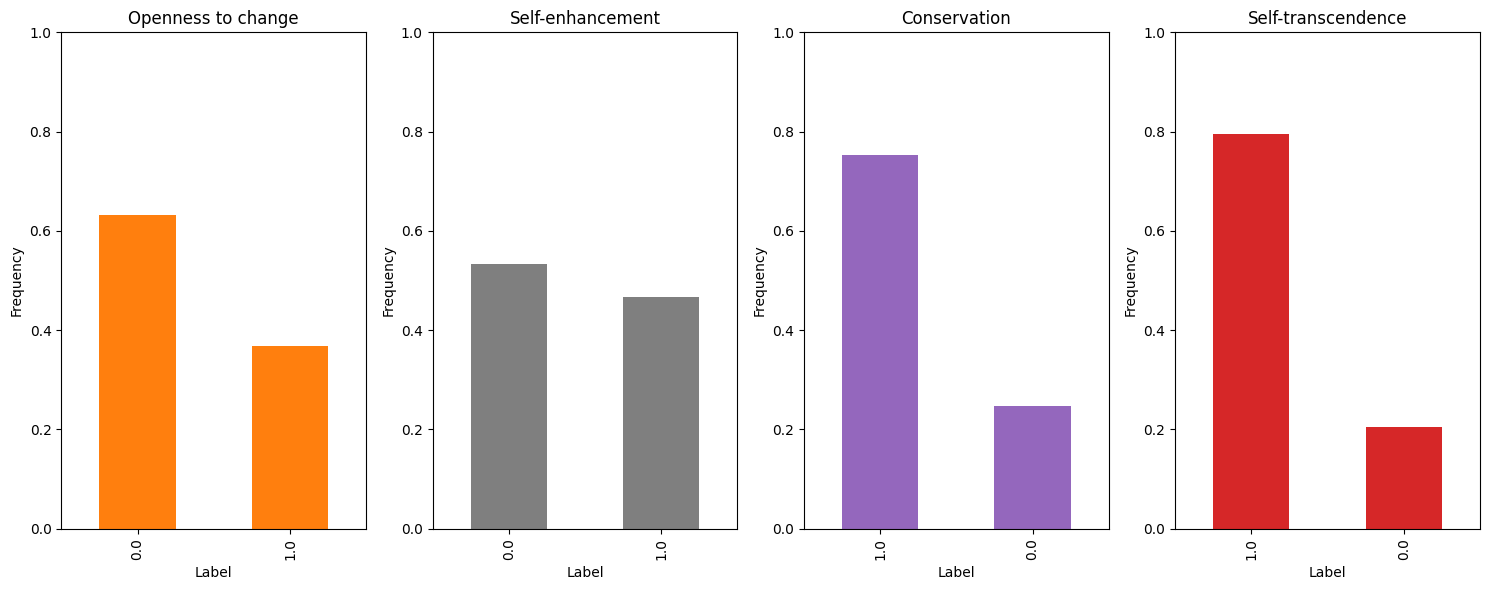

TEST SET:



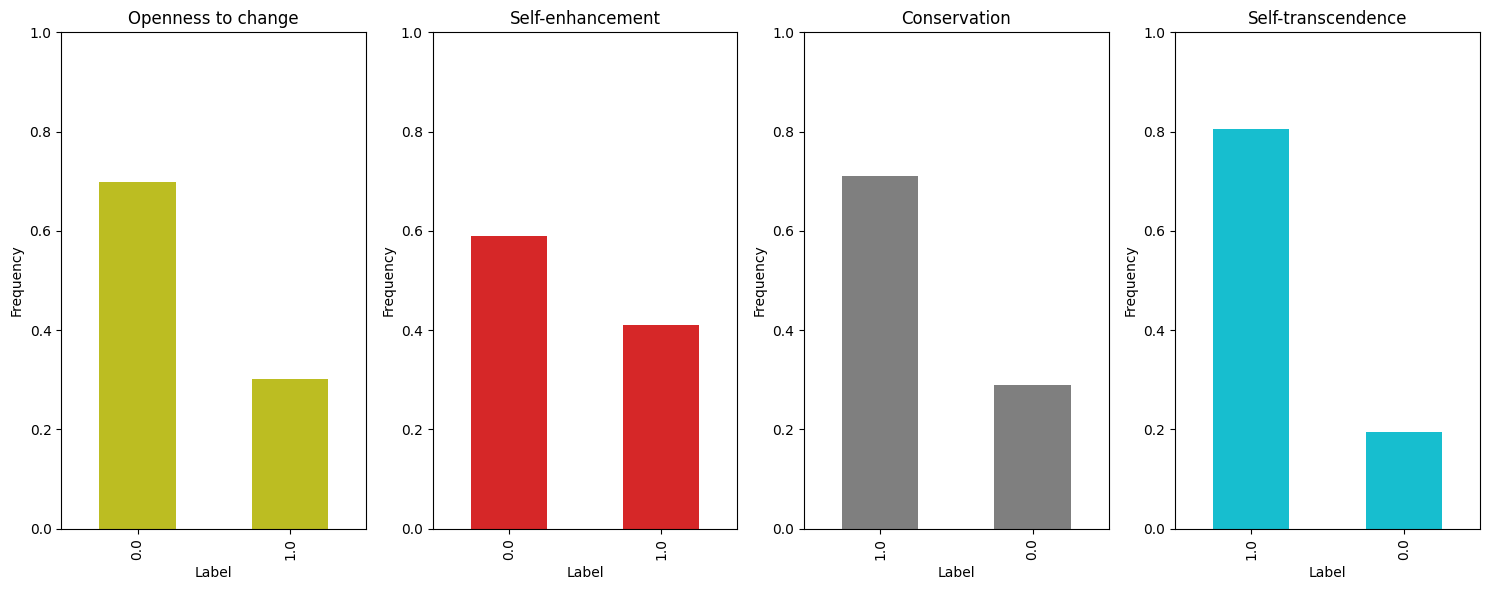

In [24]:

def plot_probability_distribution(dataframe, title):
    print(f"{str.upper(title)} SET:\n")
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
    colors = random.sample(list(mcolors.TABLEAU_COLORS.keys()), 4)
    for i in range(4):
        ax = axes[i]
        for column in dataframe.columns[4:]:
            dataframe[dataframe.columns[i+4]].value_counts(normalize=True).plot(kind='bar', ax=ax, color=colors[i])
            ax.set_title(f'{dataframe.columns[i+4]}')
            ax.set_xlabel('Label')
            ax.set_ylabel('Frequency')
            ax.set_ylim(0, 1)
    
    
    plt.tight_layout()
    plt.show()

plot_probability_distribution(train_df, "train")
plot_probability_distribution(valid_df, "validation")
plot_probability_distribution(test_df, "test")

## Exploring Sentences

In [76]:
train_df.head()

,Argument ID,Conclusion,Stance,Premise,Openness to change,Self-enhancement,Conservation,Self-transcendence
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0.0,0.0,1.0,0.0
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0.0,0.0,1.0,0.0
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,0.0,1.0,1.0,0.0
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,0.0,0.0,1.0,1.0
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,0.0,0.0,1.0,1.0


In [106]:
print(f"Distribution of 'Stance' feature values in the Training Set: \n{train_df['Stance'].value_counts(normalize=True).mul(100).round(2).to_dict()}")
print()
print(f"Distribution of 'Stance' feature values in the Validation Set: \n{valid_df['Stance'].value_counts(normalize=True).mul(100).round(2).to_dict()}")
print()
print(f"Distribution of 'Stance' feature values in the Test Set: \n{test_df['Stance'].value_counts(normalize=True).mul(100).round(2).to_dict()}")


Distribution of 'Stance' feature values in the Training Set: 
{'in favor of': 53.74, 'against': 46.26}

Distribution of 'Stance' feature values in the Validation Set: 
{'in favor of': 55.8, 'against': 44.2}

Distribution of 'Stance' feature values in the Test Set: 
{'in favor of': 55.08, 'against': 44.92}


In [107]:
def refine_df(df):
    new_df = df.copy()
    new_df["Stance"] = df['Stance'].replace({'in favor of': 1, 'against': 0}).astype("float32")
    new_df.drop(df.columns[4:], axis=1, inplace=True)
    new_df['Label'] = df.iloc[:, 4:].apply(lambda x: list(x), axis=1)
    return new_df

train_dataframe = refine_df(train_df)
test_dataframe = refine_df(test_df)
valid_dataframe = refine_df(valid_df)


In [108]:
display(train_dataframe.head())

,Argument ID,Conclusion,Stance,Premise,Label
0,A01002,We should ban human cloning,1.0,we should ban human cloning as it will only ca...,"[0.0, 0.0, 1.0, 0.0]"
1,A01005,We should ban fast food,1.0,fast food should be banned because it is reall...,"[0.0, 0.0, 1.0, 0.0]"
2,A01006,We should end the use of economic sanctions,0.0,sometimes economic sanctions are the only thin...,"[0.0, 1.0, 1.0, 0.0]"
3,A01007,We should abolish capital punishment,0.0,capital punishment is sometimes the only optio...,"[0.0, 0.0, 1.0, 1.0]"
4,A01008,We should ban factory farming,0.0,factory farming allows for the production of c...,"[0.0, 0.0, 1.0, 1.0]"


In [152]:
display(train_df["Premise"].describe())
display(train_df["Conclusion"].describe())

count                     5393
unique                    5313
top       Migrants sell drugs.
freq                         2
Name: Premise, dtype: object

count                                         5393
unique                                         332
top       We should abolish the three-strikes laws
freq                                           114
Name: Conclusion, dtype: object

In [122]:
def compute_text_lengths(train_df: pd.DataFrame, test_df:pd.DataFrame, valid_df:pd.DataFrame):
    lengths = dict()

    for i in ['Premise', 'Conclusion']:
        lengths[i] = {
            'Training': {
                'Max Length': train_df[i].apply(len).max(),
                'Min Length': train_df[i].apply(len).min(),
                'Mean Length': train_df[i].apply(len).mean().round(2)
            },
            'Test': {
                'Max Length': test_df[i].apply(len).max(),
                'Min Length': test_df[i].apply(len).min(),
                'Mean Length': test_df[i].apply(len).mean().round(2)
            },
            'Validation': {
                'Max Length': valid_df[i].apply(len).max(),
                'Min Length': valid_df[i].apply(len).min(),
                'Mean Length': valid_df[i].apply(len).mean().round(2)
            }
        }
    
    return lengths

for i in compute_text_lengths(train_dataframe, test_dataframe, valid_dataframe).items():
    print(f"{i[0]} Feature:")
    print(f"\tTraining Set: \n\t\tMax Length: {i[1]['Training']['Max Length']}, \n\t\tMin Length: {i[1]['Training']['Min Length']}, \n\t\tMean Length: {i[1]['Training']['Mean Length']}")
    print(f"\tValidation Set: \n\t\tMax Length: {i[1]['Validation']['Max Length']}, \n\t\tMin Length: {i[1]['Validation']['Min Length']}, \n\t\tMean Length: {i[1]['Validation']['Mean Length']}")
    print(f"\tTest Set: \n\t\tMax Length: {i[1]['Test']['Max Length']}, \n\t\tMin Length: {i[1]['Test']['Min Length']}, \n\t\tMean Length: {i[1]['Test']['Mean Length']}")
    print("\n")

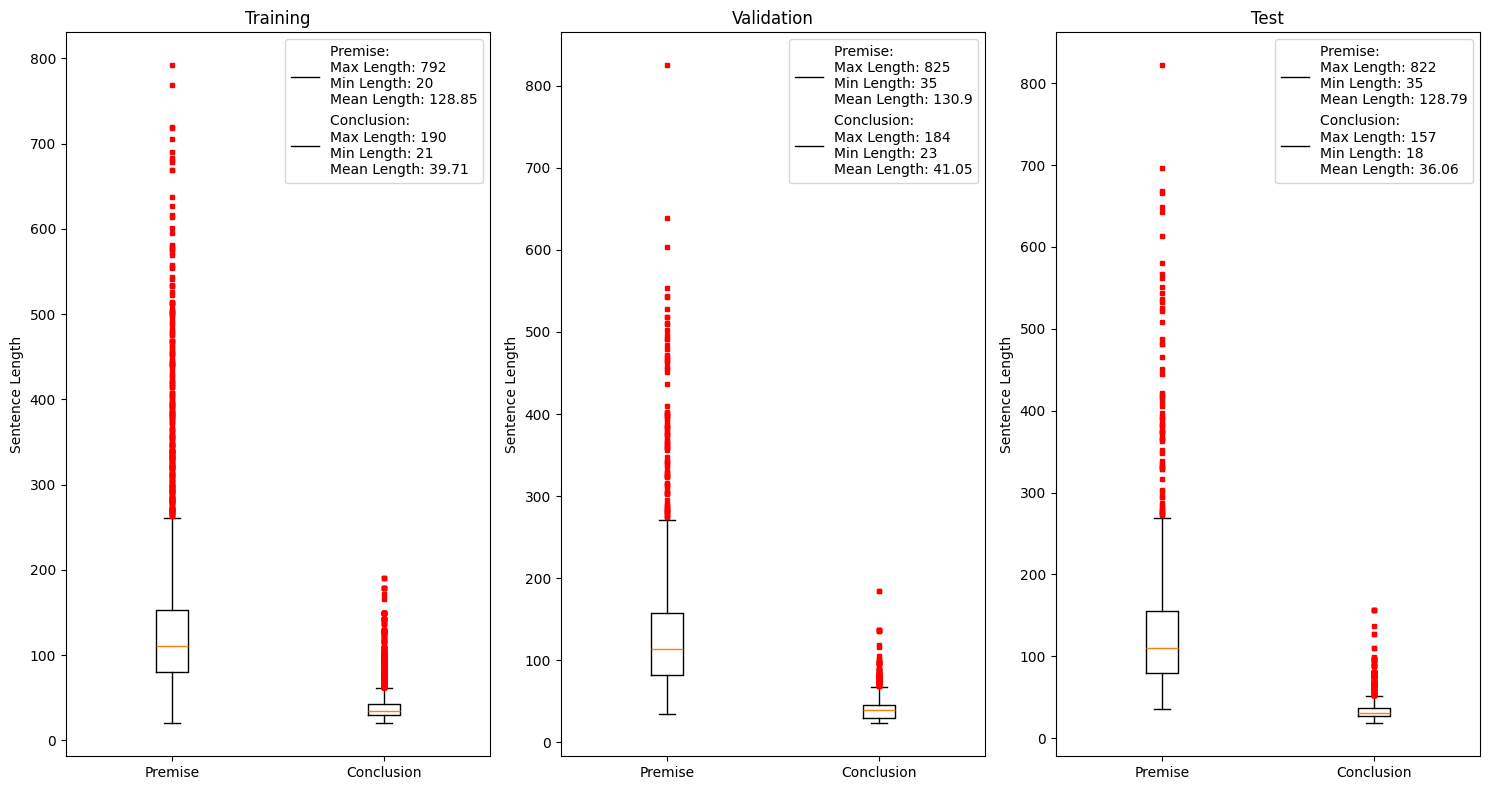

In [149]:
def plot_sentence_lengths(train: pd.DataFrame, test_df:pd.DataFrame, valid_df:pd.DataFrame):
    features = ['Premise', 'Conclusion']
    train_lengths = train_df[features].apply(lambda x: x.str.len())
    valid_lengths = valid_df[features].apply(lambda x: x.str.len())
    test_lengths = test_df[features].apply(lambda x: x.str.len())

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))
    labels = ['Training', 'Validation', 'Test']
    data = [train_lengths, valid_lengths, test_lengths]
    flierprops = dict(marker='s', markerfacecolor='r', markersize=3,
                  linestyle='none', markeredgecolor='r')
    

    for i, ax in enumerate(axes):
        ax.boxplot(data[i].values,flierprops=flierprops)
        ax.set_xticklabels(['Premise', 'Conclusion'])
        ax.set_title(labels[i])
        ax.set_ylabel('Sentence Length')
            
        text_lengths = compute_text_lengths(train_df, test_df, valid_df)
        legend_premise_text = f"{features[0]}: \nMax Length: {text_lengths[features[0]][labels[i]]['Max Length']}\nMin Length: {text_lengths[features[0]][labels[i]]['Min Length']}\nMean Length: {text_lengths[features[0]][labels[i]]['Mean Length']}"
        legend__conclusion_text = f"{features[1]}: \nMax Length: {text_lengths[features[1]][labels[i]]['Max Length']}\nMin Length: {text_lengths[features[1]][labels[i]]['Min Length']}\nMean Length: {text_lengths[features[1]][labels[i]]['Mean Length']}"
        ax.legend([legend_premise_text,legend__conclusion_text], loc='upper right',ncol=1)

    plt.tight_layout()
    plt.show()

plot_sentence_lengths(train_dataframe,test_dataframe,valid_dataframe)

p(y_hat = y) = p(y_hat = 0) * p(y = 0) + p(y_hat = 1) * p(y = 1)

p(y_hat = Openess_to_change) = 0.5 * 0.63 + 0.5 * 0.37 = 0.315 + 0.185 = 0.5  
p(y_hat = Self-enhancement) = 0.5 * 0.54 + 0.5 * 0.46 = 0.27 + 0.23 = 0.5      
p(y_hat = Conservation) = 0.5 * 0.24 + 0.5 * 0.0.76 = 0.12 + 0.38 = 0.5          
p(y_hat = Self-trascendence) = 0.5 * 0.24 + 0.5 * 0.0.76 = 0.12 + 0.38 = 0.5

mean = 0.5


In [150]:
#Random Unifor Classifier

num_samples = len(train_df)
num_classes = 4

random_predictions = np.random.randint(2, size=(num_samples, num_classes))  

num_zeros = np.count_nonzero(random_predictions == 0)
num_ones = np.count_nonzero(random_predictions == 1)
print("Number of 0s:", num_zeros)
print("Number of 1s:", num_ones)

true_labels = train_df.iloc[:, 4:].values  


accuracy = np.mean(np.equal(random_predictions, true_labels))
print("Accuracy: {:.2f}".format(accuracy))


Number of 0s: 10899
Number of 1s: 10673
Accuracy: 0.00


p(yhat = y) = P(yhat = 0) * P(y = 0) + P(yhat = 1) * P(y = 1) 

p(y_hat = Openess_to_change) = 1 * 0.63 + 0 * 0.37 = 0.63      
p(y_hat = Self-enhancement) = 1 * 0.54 + 0 * 0.46 =  0.54      
p(y_hat = Conservation) =  0 * 0.24 + 1 * 0.76 = 0.76          
p(y_hat = Self-trascendence) = 0 * 0.24 + 1 * 0.76 = 0.76      

mean = 0.63 + 0.54 + 0.76 + 0.76 / 4 = ~ 0.67


In [143]:
#Majoirty Classifier

true_labels = train_df.iloc[:, 4:].values


num_zeros = np.sum(true_labels == 0, axis=0)
num_ones = np.sum(true_labels == 1, axis=0)
print("Number of 0s:", num_zeros)
print("Number of 1s:", num_ones)

majority_predictions = np.where(num_zeros > num_ones, 0, 1)
print("Majority Predictions:", majority_predictions.shape)


accuracy = np.mean(np.equal(majority_predictions, true_labels))
print("Majority Classifier Accuracy: {:.2f}".format(accuracy))

Number of 0s: [3414 2904 1286 1288]
Number of 1s: [1979 2489 4107 4105]
Majority Predictions: (4,)
Majority Classifier Accuracy: 0.67


In [131]:
#Random Unifor Classifier

num_samples = len(train_df)
num_classes = 4
true_labels = train_df.iloc[:,4:].values

results = []
for i in range(1):

    random_predictions = np.random.uniform(size=(num_samples, num_classes))

    random_predictions[random_predictions >= 0.5] = 1
    random_predictions[random_predictions < 0.5] = 0
    num_zeros = np.count_nonzero(random_predictions == 0)
    num_ones = np.count_nonzero(random_predictions == 1)

    print("Number of 0s:", num_zeros)
    print("Number of 1s:", num_ones)
    


    model = models.Sequential([
        layers.Input(shape=(num_classes,)),  
        layers.Dense(4,activation="sigmoid")  
    ])

    model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy'])

    
    loss, accuracy = model.evaluate(random_predictions,true_labels)
    results.append(accuracy)
    print(f'Loss: {loss}, Accuracy: {accuracy}')

print(f'Average accuracy: {np.mean(results)}')


Number of 0s: 10788
Number of 1s: 10784
169/169 [==============================] - 0s 1ms/step - loss: 0.7435 - accuracy: 0.2444
Loss: 0.7434824109077454, Accuracy: 0.24439087510108948
Average accuracy: 0.24439087510108948


In [49]:
#Majoirty Classifier

true_labels = train_df.iloc[:,4:].values
num_samples = len(train_df)
num_labels = 4


majority_class = train_df.iloc[:,4:].value_counts().idxmax()  
majority_class = np.array([majority_class] * len(train_df))



accuracy = np.mean(true_labels == majority_class)
print("Accuracy Training set:", accuracy)


Accuracy Training set: 0.6735583163359911


## Dataset 